## Problem 1: Create a polygon from a list of coordinates (5 points)

In the first problem, **the aim is to create a polygon based on the provided coordinates, and to plot the polygon in a map.** 

Two lists, `longitudes` and `latitudes`, contain the input coordinates for the polygon. You need to ‘assemble’ the coordinates to individual tuples of one longitude and one latitude coordinate each (The first coordinate pair looks like this: `(29.99671173095703, 63.748023986816406)`).

In [2]:
# Longitudes in decimal degrees
longitudes = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Latitudes in decimal degrees
latitudes = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

### a) Create a `shapely.geometry.Polygon` geometry `polygon` based on the coordinates

- Create a list of coordinate pairs based on the provided longitudes and latitudes and store the list in a variable `coordinate_pairs`. A coordinate pair can be either a tuple or a list.
- Create a `shapely.geometry.Polygon` using the `coordinate_pairs`. Store the polygon in a variable `polygon`.

In [3]:
from shapely.geometry import Polygon
coordinate_pairs = []
for long, lat in zip(longitudes, latitudes):
    pair = (long, lat)
    coordinate_pairs.append(pair)
polygon = Polygon(coordinate_pairs)



In [4]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the first coordinate pair. Shoud be: (29.99671173095703, 63.748023986816406)
print(coordinate_pairs[0])

(29.99671173095703, 63.748023986816406)


In [5]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the data type of your polygon:
print(polygon.geom_type)

Polygon


### b) Insert the polygon into a newly created `geopandas.GeoDataFrame` called `geo`

(see the hints for this exercise for more different approaches to complete this task)

Be sure to define a coordinate reference system for the data (the coordinates are in WGS84 format)

In [6]:
import geopandas
geo = geopandas.GeoDataFrame()
data = {'geometry': []}
data['geometry'].append(polygon)
geo = geopandas.GeoDataFrame(data, crs='EPSG:4326')


In [6]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the content of the GeoDataFrame:
print(geo.head())

                                            geometry
0  POLYGON ((29.99671 63.74802, 31.58196 62.90790...


In [7]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the number of rows:
print(len(geo))

1


### c) Plot the data set

Which shape do you see? *Add a comment to the pull request to answer!*

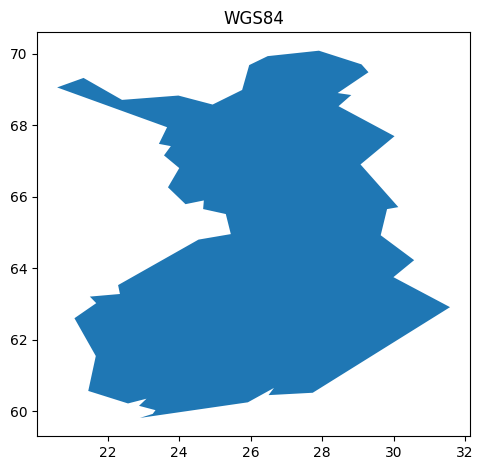

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
geo.plot(ax=ax)
ax.set_title('WGS84')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
#distorted shape of Finland



### d) Save the `GeoDataFrame` to a file

Save the file in GeoPackage format, save it inside the `data` directory, and name it `mysterious-polygon.gpkg`.

In [9]:
import pathlib
EXERCISE_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = EXERCISE_PATH / 'data'
DATA_FILE = DATA_DIRECTORY / 'mysterious-polygon.gpkg'
geo.to_file(DATA_FILE, driver='GPKG')

In [11]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check if output file exists
import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"
assert (DATA_DIRECTORY / "mysterious-polygon.gpkg").exists()



---

### Well done!

You can continue with [Exercise-2 Problem 2](Exercise-2-problem-2.ipynb)